# Base vs 1D-CNN vs 1D-CNN+SMOTE

In [56]:
# enable auto-reloading submodules
%reload_ext autoreload
%autoreload 2

# hidpi plots for retina displays
%config InlineBackend.figure_format = 'retina'

import pandas as pd
from utils import load_results
import os
import matplotlib.pyplot as plt

In [57]:
os.makedirs('./results/cnn_comparison', exist_ok=True)

def box_plots(pathogen, base_results, cnn_results, xlabels, fname_prefix):
    for drug in base_results:
        plt.boxplot([
            base_results[drug],
            cnn_results.base_results[drug]['AUROC'].to_list(),
            cnn_results.smote_results[drug]['AUROC'].to_list(),
        ])
        plt.xticks(
            [1, 2, 3],
            xlabels
        )
        plt.ylabel('AUROC Score')
        plt.suptitle('5-Fold Cross Validation of Baseline Model and CNNs')
        plt.title(f'{pathogen} // {drug}')
        plt.savefig(
            f'./results/cnn_comparison/{fname_prefix}_{drug.replace(" ", "_")}.png',
            facecolor='white',
            dpi=300,
        )
        plt.show()

# E. Coli

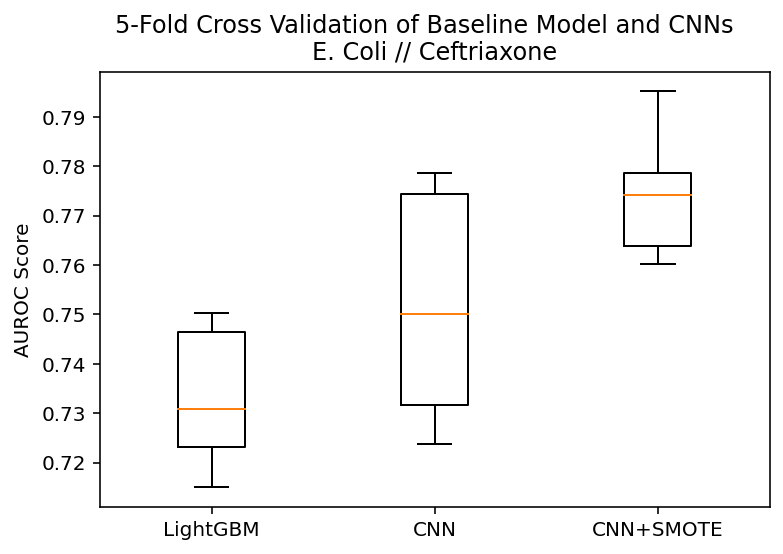

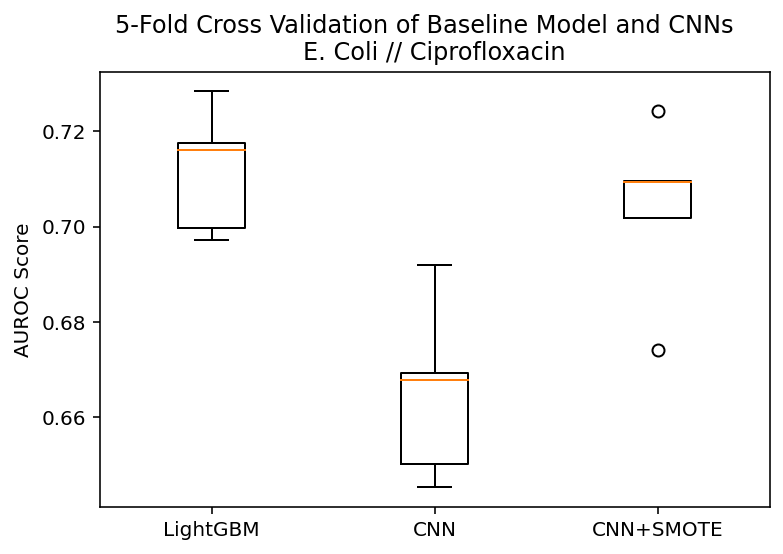

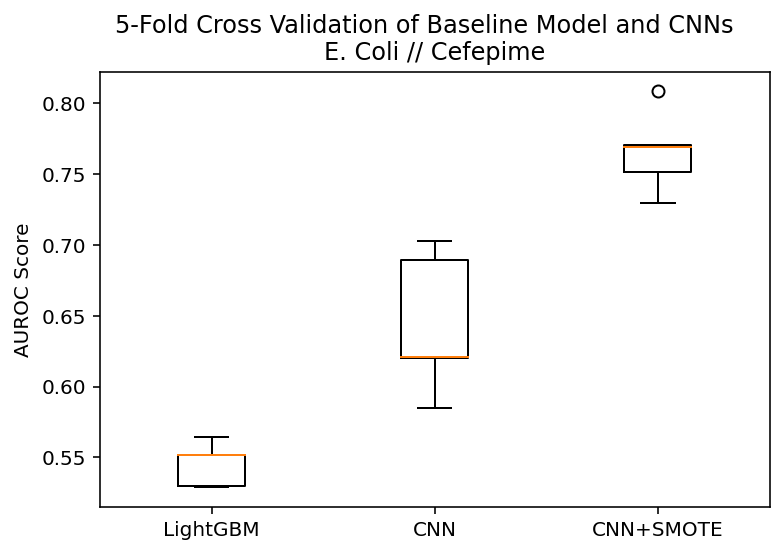

In [58]:
box_plots(
    pathogen='E. Coli',
    fname_prefix='ecoli',
    xlabels=['LightGBM', 'CNN', 'CNN+SMOTE'],
    cnn_results=load_results('./results/1d_cnn/ecoli'),
    base_results={
        'Ceftriaxone': [
            0.7503225806451613,
            0.7308755760368664,
            0.7151152073732718,
            0.7463594470046083,
            0.7232258064516129,
        ],
        'Ciprofloxacin': [
            0.7283968861327352,
            0.6971438560062716,
            0.7161389086055110,
            0.6997367389531004,
            0.7175902874153803,
        ],
        'Cefepime': [
            0.5292342234573126,
            0.5646950433020084,
            0.5516215220195321,
            0.5516215220195321,
            0.5298507462686567,
        ],
    },
)


## S. aureus

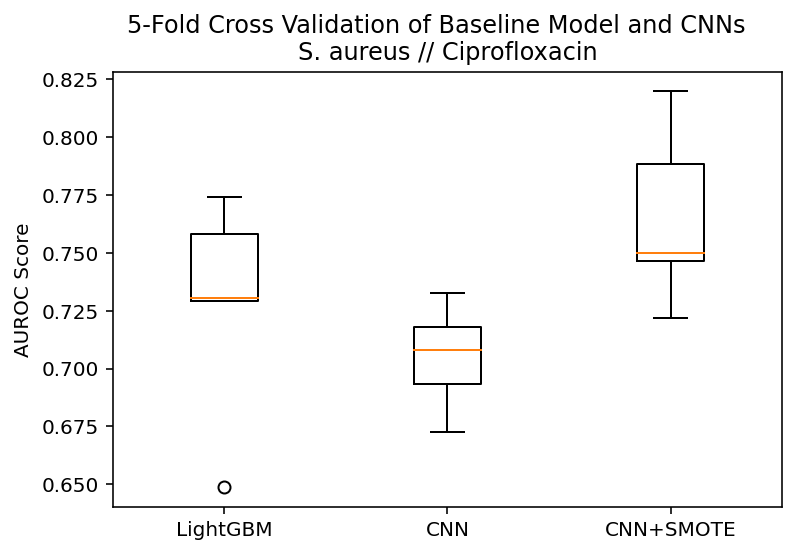

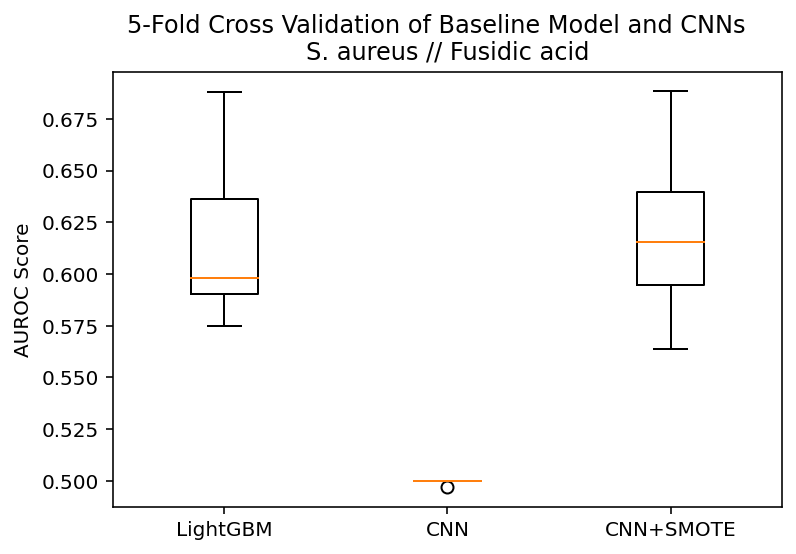

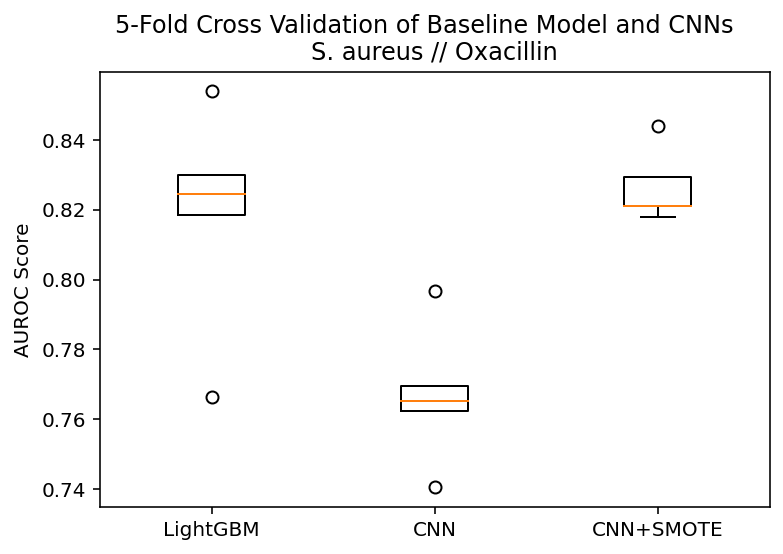

In [59]:
box_plots(
    pathogen='S. aureus',
    fname_prefix='aureus',
    xlabels=['LightGBM', 'CNN', 'CNN+SMOTE'],
    cnn_results=load_results('./results/1d_cnn/aureus'),
    base_results={
        'Ciprofloxacin': [
            0.7739799,
            0.7581700,
            0.7291463,
            0.6488976,
            0.7303733,
        ],
        'Fusidic acid': [
            0.5746799,
            0.6361050,
            0.5978503,
            0.5903263,
            0.6877535,
        ],
        'Oxacillin': [
            0.8245100,
            0.8299263,
            0.8185858,
            0.8538280,
            0.7662671,
        ],
    },
)

## K. pneumoniae

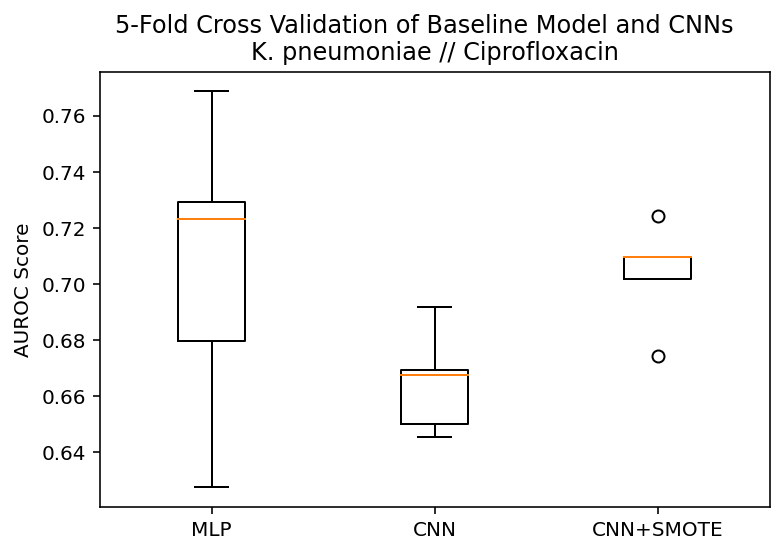

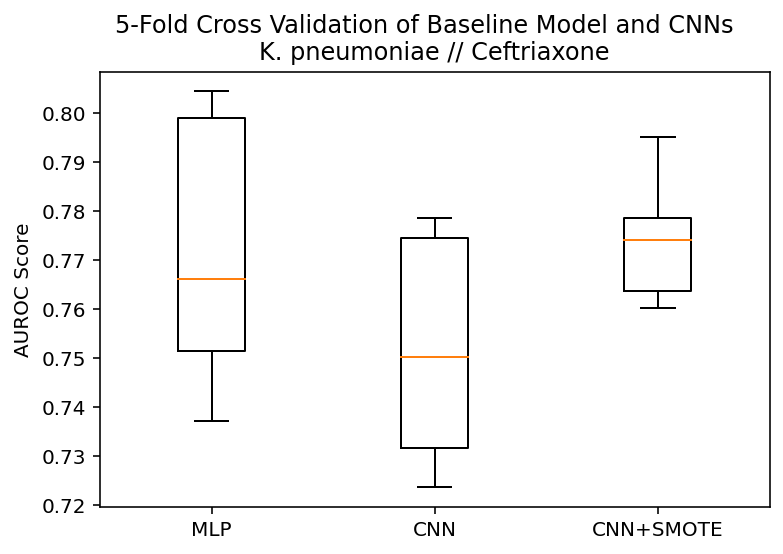

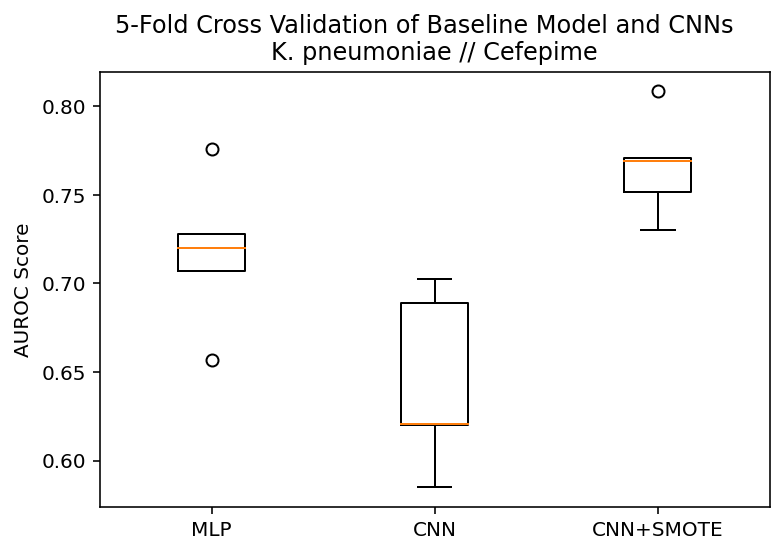

In [60]:
kpn_mlp_results = load_results('./results/kpn_mlp')

box_plots(
    pathogen='K. pneumoniae',
    fname_prefix='kpn',
    xlabels=['MLP', 'CNN', 'CNN+SMOTE'],
    cnn_results=load_results('./results/1d_cnn/ecoli'),
    base_results={d: kpn_mlp_results.base_results[d]['AUROC'] \
                        for d in ['Ciprofloxacin', 'Ceftriaxone', 'Cefepime']},
)
